<h2><center><h1><center><font color='Red'> Tic  <font color='Green'> Tac <font color='Blue'> Toe  <font color='Orange'> Assignement :

<h5><center> By <br><br>
Farooq Ahmed  <br>
email <font color='Blue'> farooqams@hotmail.com<font color='Blue'> <br>
<h4><center> June 2022<br><br>

#### Objective of the Assignement 

###### The assignement required to build an RL agent that learns to play Numerical Tic-Tac-Toe with odd numbers using Q-Learning.


###### We will approach the problem by  assessing the significant drivers /layers and identifying the problem by Pythonic way, reducing duplcating task where possible / applicable. In addtion, using in Google Colab Pro (if Required using GPU). 


# Reset Colab Drive - Optional 

In [1]:
from google.colab import drive
drive.flush_and_unmount()
print("Data Deleted")


Data Deleted


In [2]:
!rm -rf /content/RL-TIC




# Version Control

In [3]:
%tensorflow_version 2 #1.5.0
## we use version 2 since it compitable with TDQM 

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2 #1.5.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
import tensorflow
print(tensorflow.__version__)

2.8.0


# BenchMarking System Resources

In [5]:
import psutil
cpu = psutil.cpu_count(logical=True)
print('Your runtime has {:.0f} available CPUs\n'.format(cpu))
psutil.disk_usage('/content')

Your runtime has 4 available CPUs



sdiskusage(total=179134558208, used=41607790592, free=137509990400, percent=23.2)

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Sat May 28 14:15:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
%%time
import warnings
warnings.filterwarnings('ignore')

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 24.1 µs


# Install Library [Not Available in Colab]

In [9]:
!pip install -U env -q 

# Import Regular Library

In [10]:
import datetime 
import numpy as np 
import pandas as pd
import json 

In [11]:
import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#from PIL import Image

In [12]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [13]:
import tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

In [14]:
import os
import sys
import datetime
from scipy.stats import norm

In [15]:
# Assignement Related Library 
# from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
  

In [16]:
#

In [17]:
%%time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

CPU times: user 7.58 ms, sys: 0 ns, total: 7.58 ms
Wall time: 7.08 ms


*Authenticate* and create the PyDrive client.

In [18]:
%%time
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

CPU times: user 17.5 ms, sys: 1.1 ms, total: 18.6 ms
Wall time: 331 ms


# Download  and Cleaning Data


In [19]:
%%time
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
CPU times: user 176 ms, sys: 45.7 ms, total: 222 ms
Wall time: 3.9 s


In [20]:
!ls #'/content/gdrive'

gdrive	Policy.pkl  sample_data  States_tracked.pkl


In [21]:
if os.path.isdir('/content/RL-TIC')==True:
  print('Path Exist')
if os.path.isdir('/content/RL-TIC')==False:
  os.mkdir('/content/RL-TIC')

In [22]:
# set default path for import local library 
sys.path.insert(0,'/content/RL-TIC')

 We copy data in Colab for faster execution

In [23]:
!cp -av '/content/gdrive/MyDrive/RL-TIC' '/content'

'/content/gdrive/MyDrive/RL-TIC/TCGame_Env.py' -> '/content/RL-TIC/TCGame_Env.py'


In [24]:
root_path = '/content/RL-TIC' # use CoLab Drive for faster processing 

In [25]:
!ls 

gdrive	Policy.pkl  RL-TIC  sample_data  States_tracked.pkl


In [26]:
root_path

'/content/RL-TIC'

In [27]:
from TCGame_Env import TicTacToe

In [28]:
env = TicTacToe()

# Data preparation




##### Function to convert state array into a string to store it as keys in the dictionary

In [29]:
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

##### Defining a function which will return valid (all possible actions) actions corresponding to a state
##### Important to avoid errors during deployment.

In [30]:
def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

##### Defining a function which will add new Q-values to the Q-dictionary. 

In [31]:
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

# Epsilon-greedy strategy
##### Defining epsilon-greedy policy here:

In [32]:
def epsilon_greedy(state, time):
    epsilon_exploit_VS_explore = min_epsilon_allowed + (max_epsilon_allowed - min_epsilon_allowed) * np.exp(-0.000001*time)
    random_probabilty  = np.random.random()
    if random_probabilty  > epsilon_exploit_VS_explore:
        # ===> Q value fetch max value
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)
    elif random_probabilty  <= epsilon_exploit_VS_explore:
        # ===> random action generation
        agent_actions, env_actions = env.action_space(state)
        action = random.choice(list(agent_actions))
    return action

##### Tracking the state-action pairs for checking convergence

##### Initialising Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)


In [33]:
Q_dict = collections.defaultdict(dict)

In [34]:
States_track = collections.defaultdict(dict)

In [35]:
rewards_tracked =  {(2,1):0,(5,5):0, (8,3): 0, (9,7):0}

##### Initialising states to be tracked

In [36]:
def initialise_tracking_states():
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))]
    for q_value in sample_q_values:
        state = q_value[0]
        action = q_value[1]
        state1 = Q_state(state)
        States_track[state1][action] = []  
        


initialise_tracking_states()

##### Defining a function to save the Q-dictionary as a pickle file

In [37]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [38]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])
                print("saving")

In [39]:
initialise_tracking_states()

# Defining hyperparameters

In [40]:
episodes_run = 200000 

learning_rate_per_step = 0.001   # learning rate
gamma_rate_per_step = 1-learning_rate_per_step

max_epsilon_allowed = 1.0
min_epsilon_allowed = 0.001

threshold_set = 2000      
policy_threshold_allowed = 30000

### Q-update loop

In [41]:
start_time = time.time() # start_time
print(start_time)

for Q_update_episode_loop in tqdm(range(episodes_run)):
    env = TicTacToe()
    curr_state = env.state
    isTerminated = False
    add_to_dict(curr_state)
    total_reward = 0

    while not isTerminated:
        current_state_ele = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, Q_update_episode_loop)
        next_state, reward, isTerminated = env.step(curr_state, curr_action)

        next_state_ele = Q_state(next_state)
        add_to_dict(next_state)

        if isTerminated:
            Q_dict[current_state_ele][curr_action] += learning_rate_per_step * (
                (reward - Q_dict[current_state_ele][curr_action]))
        else:
            max_next = max(Q_dict[next_state_ele],
                           key=Q_dict[next_state_ele].get)
            Q_dict[current_state_ele][curr_action] += learning_rate_per_step * (
                (reward + (gamma_rate_per_step * (Q_dict[next_state_ele][max_next]))) -
                Q_dict[current_state_ele][curr_action])

        curr_state = next_state
        total_reward += reward

    # Tracking the Q-Values here
    
    if (Q_update_episode_loop == threshold_set-1):        #at the 1999th episode
        initialise_tracking_states()

    if ((Q_update_episode_loop+1) % threshold_set) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')
        print('saving file')

    # Saving the Policy here
    
    if ((Q_update_episode_loop+1)% policy_threshold_allowed ) == 0:  #every 30000th episodes_run, the Q-dict will be saved
        save_obj(Q_dict,'Policy')

elapsed_time = time.time() - start_time
save_obj(States_track, 'States_tracked')
save_obj(Q_dict, 'Policy')
print(elapsed_time)  

1653747354.5349483


  0%|          | 0/200000 [00:00<?, ?it/s]

saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
saving file
savi

# Check the Q-dictionary

In [42]:
display(Q_dict)

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.9299863310677419,
              (0, 3): -0.926803966778456,
              (0, 5): -0.9290779624778445,
              (0, 7): -2.0838246512254712,
              (0, 9): -1.943722683445003,
              (1, 1): -0.9350743670160692,
              (1, 3): -0.9332467827954322,
              (1, 5): -0.9270042426957615,
              (1, 7): -2.002684969709118,
              (1, 9): -2.0538286151006493,
              (2, 1): -0.9299973236844441,
              (2, 3): -0.9260493966111022,
              (2, 5): -0.9167306383069161,
              (2, 7): -2.007932742504752,
              (2, 9): -1.963622131158032,
              (3, 1): -0.9258580111465134,
              (3, 3): -0.9277689834335716,
              (3, 5): -0.6545336736096988,
              (3, 7): -2.0899129145647026,
              (3, 9): -2.132088333760478,
              (4, 1): -0.9269908027711327,
              (4, 3): -0.9324751934239465,
              (4, 5):

In [43]:
len(Q_dict)

375182

# Epsilon - decay check

In [44]:
max_epsilon_allowed = 1.0
min_epsilon_allowed = 0.001
time = np.arange(0,5000000)
epsilon_list = []
for run_loop_decay in tqdm(range(0,5000000)):
    epsilon_list.append(min_epsilon_allowed + (max_epsilon_allowed - min_epsilon_allowed) * np.exp(-0.000001*run_loop_decay))

  0%|          | 0/5000000 [00:00<?, ?it/s]

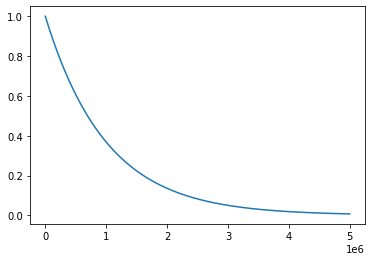

In [45]:
plt.figsize=(15, 15)
plt.plot(time, epsilon_list)
plt.show()